In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd
from math import pi, sin, cos

(ode:practical_work:duffing_oscillator)=
# Vibrational energy harvesting using a Duffing oscillator

**Author**: Ludovic Charleux (ludovic.charleux@univ-smb.fr)

:::{admonition} Required files
:class: important
In order to display figures properly, please download these images from {cite:ps}`huguet2019`:

* {download}`huguet_experimental_setup.png <huguet_experimental_setup.png>`
* {download}`huguet_model_design.png <huguet_model_design.png>`  

And put it in your working directory along with this notebook. This tutorial is inspired by the PhD work of Thomas Huguet, in particular the article {cite:ps}`huguet2019` available [here](https://hal.archives-ouvertes.fr/hal-02092544/document). Download it and read it to better understand the context of this exercise.


:::

## Introduction
The [Duffing oscillator](https://en.wikipedia.org/wiki/Duffing_equation)  is a one-degree-of-freedom oscillator which, unlike a harmonic oscillator, has a non-linearity in its stiffness function. In its most general form, its differential equation can be written as:

$$
\ddot x + \delta \dot x + \alpha x  +  \beta x^3 = A \sin (\omega_d t)
$$

The non-linearity comes from the $\beta x^3$ term. In this tutorial, we are going to work on a Duffing oscillator used in a practical purpose to recover vibratory energy in order to power autonomous communicating sensors. We are going to use the [PhD thesis of Thomas Huguet](https://tel.archives-ouvertes.fr/tel-02061864) from the INSA Lyon and the University of Savoie Mont Blanc (defended in 2018).
In the context of his article {cite:t}`huguet2019`, the choice of a Duffing oscillator is justified by its ability to efficiently recover energy over a broader frequency band than an equivalent harmonic oscillator. 
We will discuss some very interesting aspects of the Duffing oscillator, including: 
* Its ability to have several different solutions for the same excitation.
* Its ability to respond chaotically in some cases.

The Duffing oscillator that we will model is mechanically bistable, it is realized using the principle described on the diagram below (from  {cite:ps}`huguet2019`):

![](huguet_model_design.png)

A beam with a mass in its center is compressed to buckling. 
It is then excited by means of a shaker which represents the vibrations present in the environment. 
An electrical extraction circuit is present but will not be modeled in this tutorial to simplify your task. 
The system has been manufactured and tested in the laboratory and is shown in the figure below (from  {cite:ps}`huguet2019`):

![](huguet_experimental_setup.png)

The differential equation associated with this system is as follows:

$$
\ddot x + \dfrac{\omega_0^2}{2}\left(\dfrac{x^2}{x_{w}^2} - 1\right)x + \dfrac{\omega_0}{Q} \dot x = A_d \sin \left( \omega_d t \right)
$$

Where:
* The position of the mass, its speed and acceleration are respectively noted $x$, $\dot x$ and $\ddot x$.
* The stable equilibrium position, or **well** position,  is noted $\pm x_{w}$ (noted $x_0$ on the figure above).
* The resonance frequency at the bottom of the well is noted $\omega_0$.
* The quality factor is noted $Q$.
* The excitation is defined by its amplitude $A_d$ and its pulsation $\omega_d = 2 \pi f_d$ where $f_d$ is its frequency.

**Note**: In the configuration studied in the paper, an additional equation describes the behavior of the electrical energy extraction circuit. To simplify our task, it is not modeled in this example. You can add it if you wish, based on the article and by integrating the voltage $v$ to your vector $X$.

The numerical values of these parameters are defined here:

In [2]:
xw = 0.5e-3  # meters
w0 = 121.0  # radians per second
Q = 87.0  # dimensionless
fd = 50.0  # Hertz
wd = 2.0 * pi * fd
Ad = 2.5  # meters per second squared

## Part 1: ODE reformulation

First, you are asked to reformulate the ODE to first order using the standard form seen in the course:
    
$$
\dot X = f(X, t)
$$

With:

$$
X = \begin{bmatrix}
x \\
\dot x
\end{bmatrix}
$$

And, as a consequence:

$$
\dot X = \begin{bmatrix}
\dot x \\
\ddot x
\end{bmatrix}
$$


In [3]:
# COMPLETE THIS CELL

def f(X, t):
    """
    Duffing equation.
    """
    x, dotx = X
    dotX = np.zeros(2)
    # COMPLETE
    #dotX[0] = 
    #dotX[1] =
    return dotX

## Part 2: Time integration

### Integration

Integrate the equation with respect to time from a point $X_0$ of your choice during $N_T=1000$ periods with $N_F=60$ time steps per period:

In [4]:
# COMPLETE THIS CELL

# SETUP
NT = 1000  # NUMBER OF EXCITATION PERIODS
NF = 180  # FRAMES PER EXCITATION PERIODS
Td = fd**-1  # EXCITATION FREQUENCY
dt = Td / NF  # TIME STEP
#t = 
X0 = np.array([0.0, 0.0])  # CHANGE THE VALUES TO YOUR LIKING
# sol = # SOLVE THE ODE
# x = 
# dotx = 

### Amplitude *vs.* time

Plot the resulting position vs time $(t, x)$:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


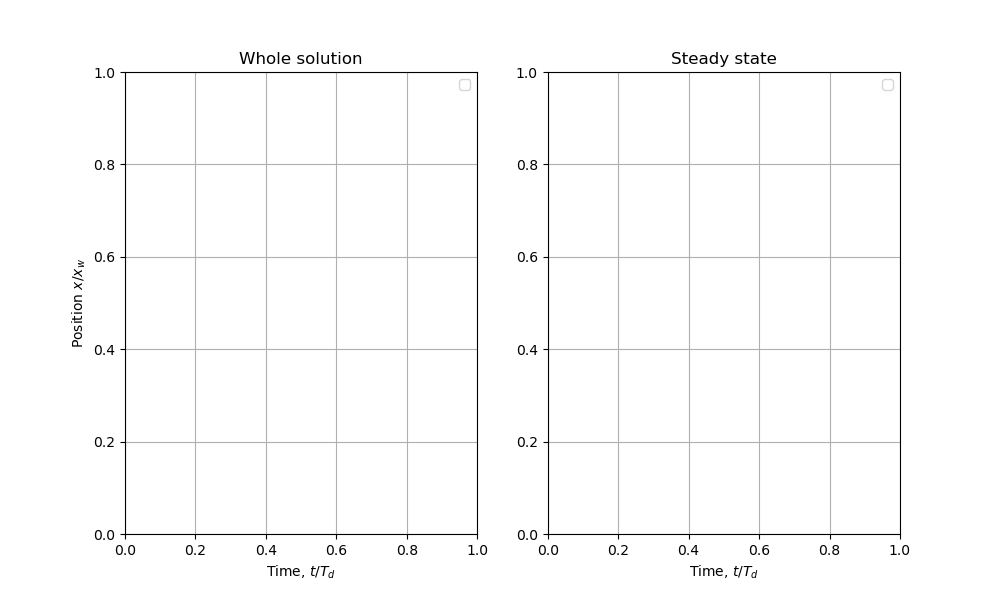

In [5]:
# xmax = x.max() / xw
# xmin = x.min() / xw
# xspan = xmax - xmin
# xlim = xmin - .1 * xspan, xmax +.1 * xspan

fig = plt.figure(figsize = (10, 6))
ax1 = fig.add_subplot(1,2,1)
plt.title("Whole solution")
# plt.plot(t/Td, x/xw, "r-", label = "Whole solution")
# plt.plot(t[-5*NF:]/Td, x[-5*NF:]/xw, "b-", label = "Last 5 periods")
plt.grid()
plt.legend()
plt.xlabel("Time, $t/T_d$")
plt.ylabel("Position $x/x_{w}$")
# plt.ylim(*xlim)
ax2 = fig.add_subplot(1,2,2)
plt.title("Steady state")
# plt.plot(t[-5*NF:]/Td, x[-5*NF:]/xw, "b-", label = "Last 5 periods")
plt.grid()
plt.legend()
# plt.ylim(*xlim)
plt.xlabel("Time, $t/T_d$")
plt.show()

### Phase plane

Plot the resulting trajectory in the phase plane $(x, \dot x)$:

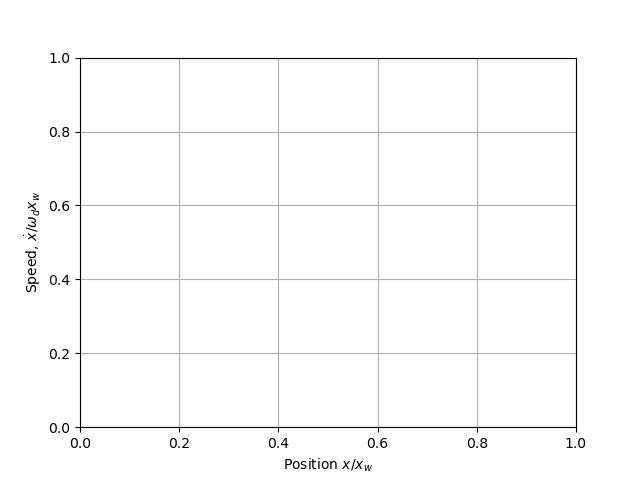

In [6]:
plt.figure()
# plt.plot(x/xw, dotx/(xw*w0), "r-", label = "Transient regime")
# plt.plot(x[-5*NF:]/xw, dotx[-5*NF:]/(xw*w0), "b-", label = "Steady state")
plt.grid()
plt.xlabel("Position $x/x_{w}$")
plt.ylabel("Speed, $\dot x / {\omega_d x_{w}}$")
plt.show()

Depending on your starting point, the trajectory may lead to a different steady state regime.

**Questions**:
* Interpret the graphs obtained. In particular, emphasize the differences between transient and steady-state conditions. Does the latter depend on the same frequency as the acceleration imposed on the system? Is there more than one steady state? If so, how can you identify them all?
* Propose ways to extract information on the dynamic behavior of this system.

## Part 3: Poincaré sections and attractors 

The [Poincaré section](https://en.wikipedia.org/wiki/Poincar%C3%A9_map) is a tool developed by Henri Poincaré to observe and analyze the behavior of an integral curve. 
In the present case, we propose to look at a particular form of Poincaré section by plotting only the positions of the system in the phase space that correspond to whole excitation periods, *i.e.* $t = 0. \mbox{ mod } Td$.
Think of a way to plot these points and put it in place.

**Remark**: have a look at the [Numpy slicing tutorial](https://numpy.org/doc/stable/user/basics.indexing.html#slicing-and-striding) 



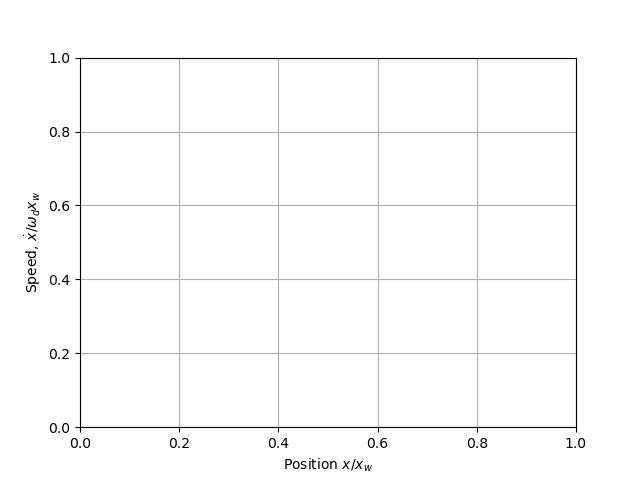

In [7]:
# POINCARE SECTION
# xp = # COMPLETE
# dotx =  # COMPLETE

plt.figure()
# plt.scatter(xp/xw, dotxp/(xw*w0), marker="o", s = 5, color = "r", label = "Poincaré Section")
# plt.scatter(xp[-5:]/xw, dotxp[-5:]/(xw*w0), marker="o", s = 30, color = "b", label = "Attractors")
plt.grid()
# plt.legend()
plt.xlabel("Position $x/x_{w}$")
plt.ylabel("Speed, $\dot x / {\omega_d x_{w}}$")
plt.show()
# plt.close("all")

At this point, you may have noticed that the Poincaré section indicates that the trajectory of the system in the phase plane is a convergence to one (or more) particular points called attractors. Change the values of $X_0$ and try to find different attractors. 

**Hint**: try these start points

In [8]:
X0 = np.array([-4.0 * xw, 3.0  * xw * w0])
X0 = np.array([-4.0 * xw, 5.0  * xw * w0])
X0 = np.array([-3.0 * xw, 4.0  * xw * w0])
X0 = np.array([-3.0 * xw, 5.0  * xw * w0])
X0 = np.array([-7.0 * xw, 20.0 * xw * w0])

**Note**: write down a list of the attractors that you have found, you will used them in the next part.

In [9]:
attractors = []  # A LIST OF ATTRACTORS

**Questions**
* How do you explain that the Poincaré section seems to converge to several points in some cases? Feel free to consult [Thomas Huguet's article](https://hal.archives-ouvertes.fr/hal-02092544/document).
* How can we classify the attractors?

## Part 4: Orbits

In the previous section, you observed that the Poincaré sections in the phase plane converge to particular points called attractors. The trajectory of an attractor in the phase plane is called an orbit.Draw these trajectories for all the attractors you found. 

**Questions**: 
* Interpret how these orbits are assembled in layers.

## Part 3: Chaos and strange attractor

We now propose to work with a different excitation frequency. In this case, you will observe that the Poincaré section does not always converge to a point, it can also converge to a surface called a [strange attractor](https://en.wikipedia.org/wiki/Attractor#Strange_attractor). Make this strange attractor obvious by drawing the Poincaré sections. What do you observe ? 


In [10]:
NT = 10000  # NUMBER OF EXCITATION PERIODS
NF = 8  # FRAMES PER EXCITATION PERIODS
fd = 25.0  # Hertz
omegad = 2.0 * pi * fd
Td = fd**-1  # EXCITATION FREQUENCY
dt = Td / NF  # TIME STEP


# CODE HERE

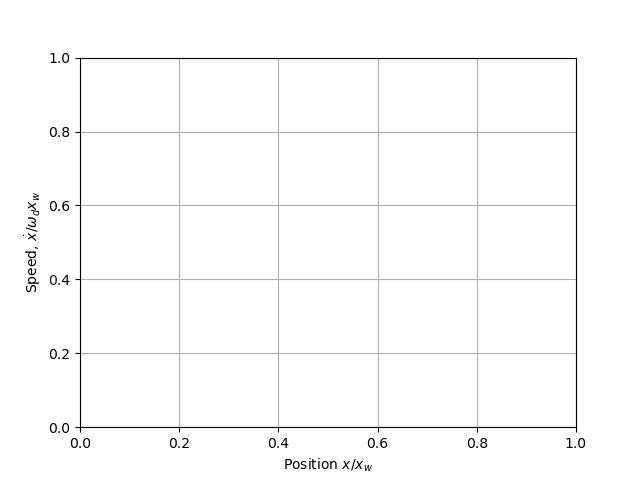

In [11]:
plt.figure()
# plt.scatter(xp/xw, dotxp/(xw*w0), marker="o", s = 5, color = "r")
plt.grid()
plt.xlabel("Position $x/x_{w}$")
plt.ylabel("Speed, $\dot x / {\omega_d x_{w}}$")
plt.show()

```{bibliography}
:filter: docname in docnames
```